
<div align="center">

<h1> <b>Problema de los tres cuerpos</b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>
<p><img alt="UdeA logo" height="180px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="100px" vspace="4px"></p>

<div align="right">       

<h3><i> <b>Manuela Marin Gomez<br>
<b>Felipe Quitian Gallego<br>
</b> <br>
Universidad de Antioquia <br>
Instituto de Física  <br>
</i></h3>
</div>


---

El problema de los tres cuerpos consiste en determinar las posiciones y velocidades de tres cuerpos que se atraen gravitacionalmente a partir de sus posiciones y velocidades iniciales.

Este problema se caracteriza por la falta de una solución analítica general; es decir, no existe una fórmula matemática simple que describa el movimiento de los cuerpos en todo momento. Esto se debe a la naturaleza no lineal y caótica del sistema, donde mínimos cambios en las condiciones iniciales pueden llevar a variaciones drásticas en el comportamiento de los cuerpos.

Para facilitar los cálculos, analicemos primero el problema de los dos cuerpos y observemos cómo varían las ecuaciones y el comportamiento del sistema al añadir una tercera masa.

#*Problema de los dos cuerpos*

Supongamos dos cuerpos $m_1$ y $m_2$ , que se atraen mutuamente con una fuerza gravitacional. Según la tercera ley de Newton, la fuerza con la que $m_1$ atrae a $m_2$ es igual en magnitud y opuesta en la dirección a la fuerza con la que $m_2$ atrae a $m_1$. Esta fuerza dependerá de las masas de los cuerpos y de la distancia entre ellos. La magnitud de la fuerza gravitacional viene dada por la ley de gravitación universal:

\begin{equation}
  \vec{F}=\frac{Gm_1m_2}{r^2} r̂
\end{equation}

Por la tercera ley de Newton la fuerza con que atrae el cuerpo 1 al 2 es igual y de sentido contrario a la fuerza con que atrae el cuerpo 2 al 1.

\begin{equation}
  \vec{F_{12}}= -\vec{F_{21}} = - \frac{Gm_1m_2}{r^2} r̂
\end{equation}

Por otro lado, la segunda ley de Newton establece que la suma de fuerzas es directamente proporcial al producto de la masa por la aceleración. Por tanto cada cuerpo se moverá bajo la fuera de acción mutua:

\begin{equation}
  \vec{F_{12}}=  m_1 \frac{d^2 \vec{r_1}}{dt^2}
\end{equation}

\begin{equation}
  \vec{F_{21}}=  m_2 \frac{d^2 \vec{r_2}}{dt^2}
\end{equation}


Restando miembro a miembro las ecuaciones tenemos:

\begin{equation}
  \frac{\vec{F_{12}}}{m_1} - \frac{\vec{F_{21}}}{m_2}=\frac{d^2\vec{r_1}}{dt^2}-\frac{d^2 \vec{r_2}}{dt^2}
\end{equation}

Luego

\begin{equation}
  \frac{Gm_1}{r^2} r̂ +\frac{Gm_2}{r^2} r̂ =\frac{d^2 \vec{r}}{dt^2}
\end{equation}

Finalmente se obtiene la siguiente ecuación diferencial

\begin{equation}
\frac{d^2 \mathbf{r}}{dt^2} = \frac{G m_1 (\mathbf{r}_1 - \mathbf{r}_2)}{|\mathbf{r}_2 - \mathbf{r}_1|^3} + \frac{G m_2 (\mathbf{r}_2 - \mathbf{r}_1)}{|\mathbf{r}_2 - \mathbf{r}_1|^3}
\end{equation}




**Veamos ahora la solución númerica para el problema de los dos cuerpos**

In [ ]:
# Librerias
import numpy as np
import scipy as sci
import scipy.integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import rc
import random

Definamos ahora las ecuaciones del sistema de dos cuerpos

\begin{equation}
\frac{d^2 \mathbf{r_1}}{dt^2} = \frac{G m_2 (\mathbf{r}_2 - \mathbf{r}_1)}{|\mathbf{r}_2 - \mathbf{r}_1|^3}
\end{equation}

\begin{equation}
\frac{d^2 \mathbf{r_2}}{dt^2} = \frac{G m_1 (\mathbf{r}_1 - \mathbf{r}_2)}{|\mathbf{r}_2 - \mathbf{r}_1|^3}
\end{equation}

In [ ]:
def ecuaciones(y, t, G, m1, m2):  # Donde y es un array que alamacena las posiciones y velocidades en un solo array

  r1, r2 = y[0:3], y[3:6]  # Los primeros 3 elementos para la posición de r1, los siguientes 3 elementos para la posición r2
  v1, v2 = y[6:9], y[9:12]  # Los elementos en la posicion 5 a 8 correesponden a v1, los elemnetos en la posicion 9 a 12 correesponden a v2

  r = np.linalg.norm(r2-r1) # Distancia entre los cuerpos

  # Ecuaciones para la primera derivada de la posción respecto al tiempo (velocidad)
  dr1dt = v1
  dr2dt = v2

  # Ecuaciones para la aceleración
  dv1dt = G*m2*(r2-r1)/r**3
  dv2dt = G*m1*(r1-r2)/r**3

  dr = np.concatenate([dr1dt, dr2dt, dv1dt, dv2dt]) # Unimos las ecuaciones en un solo array

  return dr

Si tenemos las posiciones y velocidades de dos cuerpos sometidos a atracción gravitacional mutua, partiendo de unas posiciones y velocidades dadas (condiciones iniciales), se podrán determinar las dos coordenadas de posición y las dos componentes de velocidad. Cualquier mínima variación de estos valores cambiará completamente el comportamiento del sistema y generará el caos.

Definamos entonces las condiciones iniciales.

In [ ]:
G = 1 # Constante de gravitación universal normalizada [m^3/kg s^2]

# Escogeremos el plano orbital xy

# Condiciones iniciales masa 1
m1 = 0.1  # Masa 1 [kg]
r1 = np.array([-1, 0, 0], dtype = 'float64') # Posición inicial del primer cuerpo en el espacio [m]
v1 = np.array([0, -1, 0], dtype = 'float64') # Velocidad inicial del primer cuerpo en el espacio  [m/s]

# Condiciones iniciales masa 2
m2 = 2.0  # Masa 2 [kg]
r2 = np.array([0, 0, 0], dtype = 'float64')  # Posición inicial del segundo cuerpo en el espacio [m]
v2 = np.array([0, 0, 0.01], dtype = 'float64') # Velocidad inicial del segundo cuerpo en el espacio [m/s]

y = np.concatenate([r1, r2, v1, v2]) # Unimos las condiciones iniciales en un solo array

Calculemos ahora la solución a la anterior ecuación diferencial usando odeint con el fin de obtener la evolución de la posición y la velocidad a lo largo del tiempo

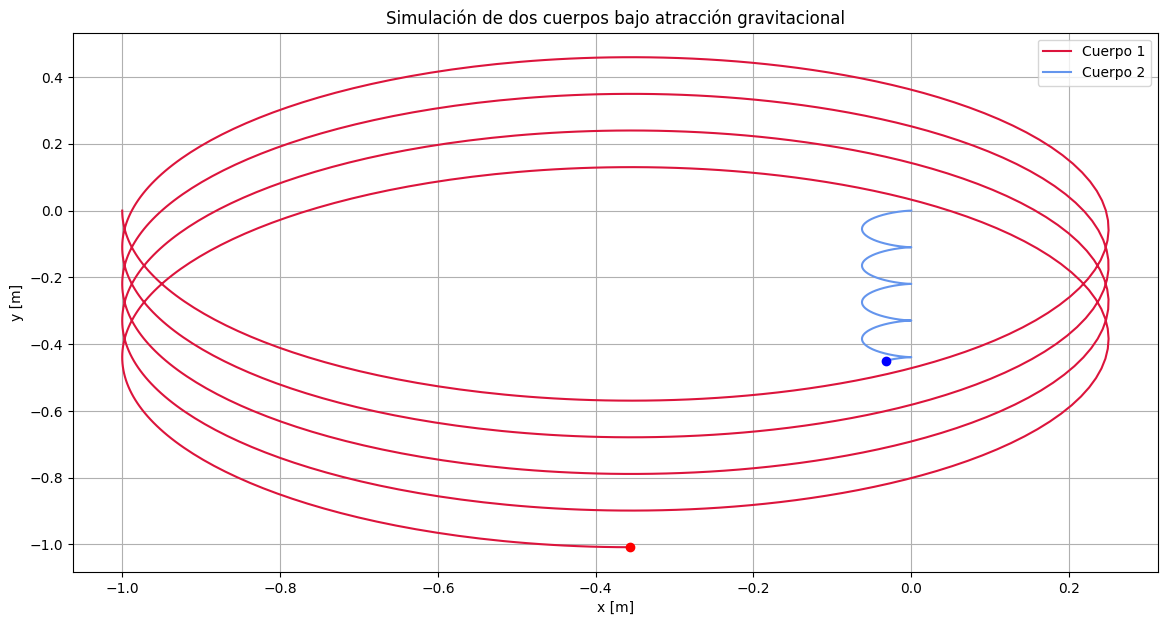

In [ ]:
t = np.linspace(0, 10, 1000) # Tiempo de simulación

sol = sci.integrate.odeint(ecuaciones, y, t, args = (G, m1, m2)) # Solucion del sistema de ecuaciones

r1_sol = sol[:,0:3] # Posiciones en función del tiempo del primer cuerpo
r2_sol = sol[:,3:6] # Posiciones en función del tiempo del segundo cuerpo
v1_sol = sol[:,6:9]  # Velocidades en función del tiempo del primer cuerpo
v2_sol = sol[:,9:12]  # Velocidades en función del tiempo del segundo cuerpo

plt.figure(figsize = (14, 7))

#trayectorias de los cuerpos
plt.plot(r1_sol[:,0], r1_sol[:,1], color = 'crimson', label = 'Cuerpo 1')  #r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1],'ro')
plt.plot(r2_sol[:,0], r2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1],'bo')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación de dos cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # 'r-' para el cuerpo 1
punto1, = ax.plot([], [], 'ro')  # 'ro' para la posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # 'b-' para el cuerpo 2
punto2, = ax.plot([], [], 'bo')  # 'bo' para la posicion actual del cuerpo 2
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])

    return traza1, punto1, traza2, punto2

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])

    return traza1, punto1, traza2, punto2

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(2*t), init_func = inicio, blit = True, interval = 20)
animacion

Retomando la ecuación $$\frac{d^2 \vec{r}}{dt^2} = \frac{Gm_1}{r^2} r̂ +\frac{Gm_2}{r^2} r̂$$

Podemos obtener una única ecuación diferencial que describa el moviemiento de un cuerpo bajo la acción de la fuerza de atracción entre los dos cuerpos:

\begin{equation}
  \frac{d^2 \vec{r}}{dt^2} = \frac{Gm_1m_2}{r^2} (\frac{1}{m_1} +\frac{1}{m_2}) r̂
\end{equation}

\begin{equation}
  \frac{d^2 \vec{r}}{dt^2} = \frac{Gm_1m_2}{r^2} (\frac{m_2+m_1}{m_1m_2}) r̂
\end{equation}

Luego
\begin{equation}
  μ \frac{d^2 \vec{r}}{dt^2}= \frac{Gm_1m_2}{r^2} r̂
\end{equation}

donde $μ=\frac{m_1m_2}{m_1+m_2}$

En este sistema de referencia, el problema se reducirá al estudio del movimiento relativo de un cuerpo de masa $μ$ bajo la influencia de una fuerza gravitacional que actúa como si toda la masa del sistema estuviera concentrada en un punto.

Con esto en mente para un sistema de dos partículas con masas $m_1$ y $m_2$, situadas en posiciones vectoriales $r_1$ y $r_2$ respectivamente podemos definir la posicón del centro de masas $R$ como

\begin{equation}
\vec{R} = \frac{m_1 \vec{r_1}  +  m_2 \vec{r_2}}{m_1+m_2}
\end{equation}

Y por lo tanto podemos expresar las posiciones de los cuerpos $r_1$ y $r_2$ en función del centro de masa de ambos cuerpos.



In [ ]:
# Pasando estas soluciones al sistema en el centro de masa
R = (m1*r1_sol+m2*r2_sol)/(m1+m2)
V = (m1*v1_sol+m2*v2_sol)/(m1+m2)

r1_sol = r1_sol-R # Redefinimos la posicion del cuerpo 1 en el centro de masa
r2_sol = r2_sol-R  # Redefinimos la posicione del cuero 2 en el centro de masa
v1_sol = v1_sol-V  # Redefinimos la velocidad del cuerpo 1 en el centro de masa
v2_sol = v2_sol-V  # Redefinimos la velocidad del cuerpo 2 en el centro de masa

plt.figure(figsize = (14, 7))

#trayectorias de los cuerpos respecto al centro de masa
plt.plot(r1_sol[:,0], r1_sol[:,1], color = 'crimson', label = 'Cuerpo 1')  #r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1],'ro')
plt.plot(r2_sol[:,0], r2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1],'bo')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación respecto al centro de masa de dos cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # 'r-' para el cuerpo 1
punto1, = ax.plot([], [], 'ro')  # 'ro' para la posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # 'b-' para el cuerpo 2
punto2, = ax.plot([], [], 'bo')  # 'bo' para la posicion actual del cuerpo 2
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])

    return traza1, punto1, traza2, punto2

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])

    return traza1, punto1, traza2, punto2

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(2*t), init_func = inicio, blit = True, interval = 20)
animacion

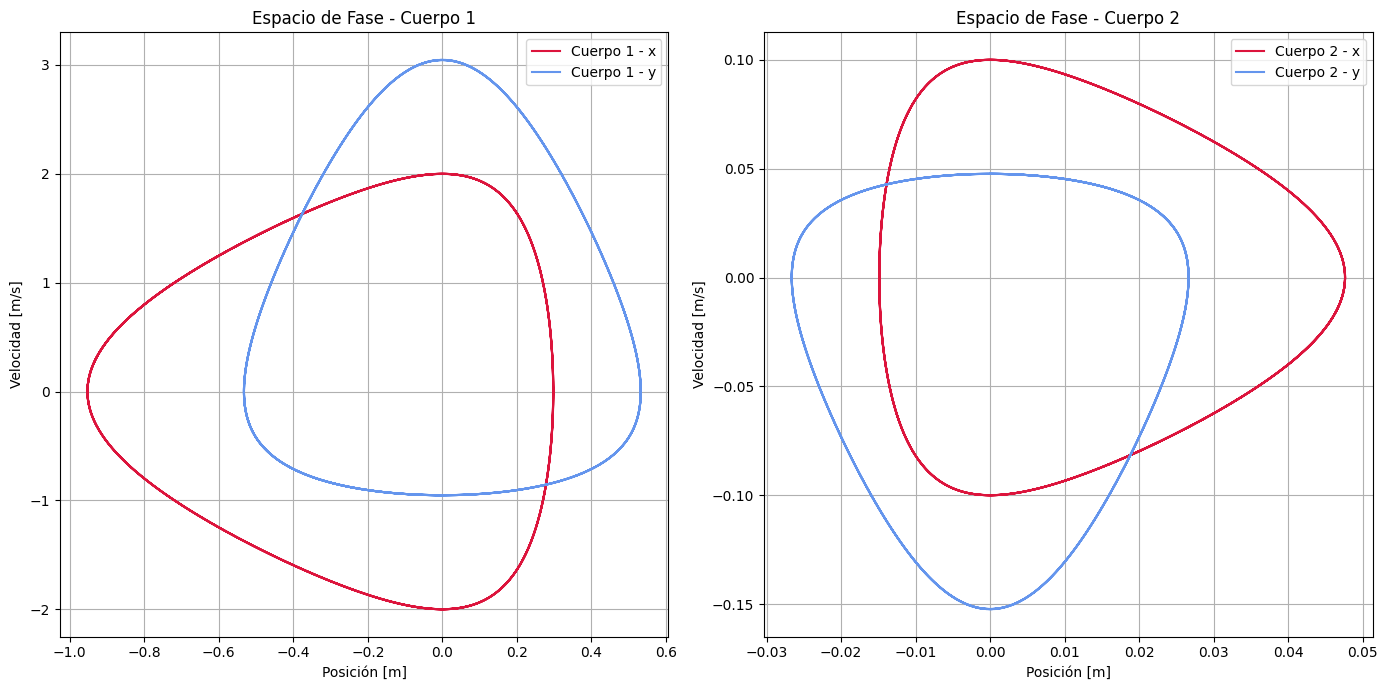

In [ ]:
# Espacio de fase para el cuerpo 1
plt.figure(figsize = (14, 7))

plt.subplot(1, 2, 1)
plt.plot(r1_sol[:,0],v1_sol[:,0],color = 'crimson', label = 'Cuerpo 1 - x')
plt.plot(r1_sol[:,1],v1_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 1 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 1')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 2
plt.subplot(1, 2, 2)
plt.plot(r2_sol[:,0], v2_sol[:,0], color = 'crimson', label = 'Cuerpo 2 - x')
plt.plot(r2_sol[:,1], v2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 2')
plt.legend()
plt.grid()

plt.tight_layout()

#**Problema de los tres cuerpos**

Desarrollemos ahora la solución numérica para un sistema de tres cuerpos

Para tres cuerpos las ecuaciones de movimiento se transforman en


$$ \frac{d^2 \mathbf{r}_1}{dt^2} = \frac{G m_2 (\mathbf{r}_2 - \mathbf{r}_1)}{|\mathbf{r}_2 - \mathbf{r}_1|^3} + \frac{G m_3 (\mathbf{r}_3 - \mathbf{r}_1)}{|\mathbf{r}_3 - \mathbf{r}_1|^3}$$


$$\frac{d^2 \mathbf{r}_2}{dt^2} = \frac{G m_1(\mathbf{r}_1 - \mathbf{r}_2)}{|\mathbf{r}_1 - \mathbf{r}_2|^3} + \frac{G m_3 (\mathbf{r}_3 - \mathbf{r}_2)}{|\mathbf{r}_3 - \mathbf{r}_2|^3}$$


$$\frac{d^2 \mathbf{r}_3}{dt^2} = \frac{G m_1 (\mathbf{r}_1 - \mathbf{r}_3)}{|\mathbf{r}_1 - \mathbf{r}_3|^3} + \frac{G m_2 (\mathbf{r}_2 - \mathbf{r}_3)}{|\mathbf{r}_2 - \mathbf{r}_3|^3}$$


In [ ]:
def tres_cuerpos(y, t, G, m1, m2, m3):  # Donde y es un array que alamacena las posiciones y velocidades en un solo array
  r1, r2, r3 = y[0:3], y[3:6], y[6:9]  # Los primeros 3 elementos para la posición de r1, los siguientes 3 elementos para la posición r2 y los siguientes tres a r3
  v1, v2, v3 = y[9:12], y[12:15], y[15:18]  # Los elemnetos en la posicion 9 a 12 correesponden a v1, los elemnetos en la posicion 12 a 15 correesponden a v2 y los otrso 3 a v3

  # Distancias entre los cuerpos
  r12 = np.linalg.norm(r2-r1)
  r13 = np.linalg.norm(r3-r1)
  r23 = np.linalg.norm(r3-r2)

  # Ecuaciones para la primera derivada de la posción respecto al tiemop(velocidad)
  dr1dt = v1
  dr2dt = v2
  dr3dt = v3

  # Ecuaciones para la segunda derivada de la posción respecto al tiemop (aceleración)
  dv1dt = G*m2*(r2-r1)/r12**3+G*m3*(r3-r1)/r13**3
  dv2dt = G*m1*(r1-r2)/r12**3+G*m3*(r3-r2)/r23**3
  dv3dt = G*m1*(r1-r3)/r13**3+G*m2*(r2-r3)/r23**3

  dr = np.concatenate([dr1dt, dr2dt, dr3dt, dv1dt, dv2dt, dv3dt]) # Unimos las ecuaciones en un solo array
  return dr

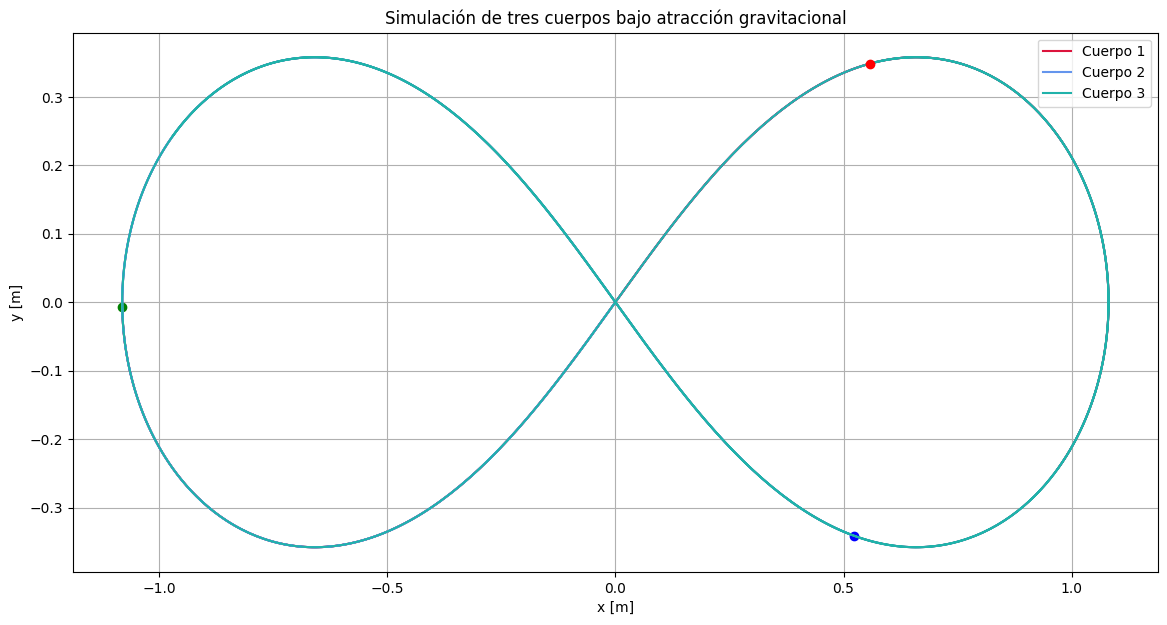

In [ ]:
# Condiciones iniciales masa 1
m1 = 1  # Masa 1 [kg]
r1 = np.array([0.97000436, -0.24308753, 0], dtype = 'float64') # Posición inicial del primer cuerpo en el espacio [m]
v1 = np.array([0.46620369, 0.43236573, 0], dtype = 'float64') # Velocidad inicial del primer cuerpo en el espacio  [m/s]

# Condiciones iniciales masa 2
m2 = 1  # Masa 2 [kg]
r2 = np.array([0, 0, 0], dtype = 'float64')  # Posición inicial del segundo cuerpo en el espacio [m]
v2 = np.array([-0.93240737, -0.86473146, 0], dtype = 'float64') # Velocidad inicial del segundo cuerpo en el espacio [m/s]

# Condiciones iniciales masa 3
m3 = 1  # Masa 3 [kg]
r3 = np.array([-0.97000436,  0.24308753,  0], dtype = 'float64')
v3 = np.array([0.46620369, 0.4323657, 0.0], dtype = 'float64')

y = np.concatenate([r1, r2, r3, v1, v2, v3]) # Unimos las condiciones iniciales en un solo array

t = np.linspace(0, 10, 1000) # Tiempo de simulación

# Calculemos ahora la solución al sistema de ecuaciones usando odeint para obtener la evolución de la posición y la velocidad
sol = sci.integrate.odeint(tres_cuerpos, y, t, args = (G, m1, m2, m3))

r1_sol = sol[:,0:3] # Posición en función del tiempo del cuerpo 1
r2_sol = sol[:,3:6] # Posición en función del tiempo del cuerpo 2
r3_sol = sol[:,6:9] # Posición del cuerpo 3
v1_sol = sol[:,9:12]  # Velocidades en función del tiempo del cuerpo 1
v2_sol = sol[:,12:15]  # Velocidades en función del tiempo del cuerpo 2
v3_sol = sol[:,15:18]  # Velocidades en función del tiempo del cuerpo 3

# Graficamos el movimiento de los cuerpos
plt.figure(figsize=(14, 7))

# Trayectorias de los cuerpos
plt.plot(r1_sol[:,0], r1_sol[:,1], color='crimson', label='Cuerpo 1') # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1], 'go')
plt.plot(r2_sol[:,0], r2_sol[:,1], color='cornflowerblue', label='Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1], 'bo')
plt.plot(r3_sol[:,0],  r3_sol[:,1],  color='lightseagreen', label='Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'ro')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación de tres cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # Trayectoria del cuerpo 1
punto1, = ax.plot([], [], 'ro')  # Posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # Trayectoria del cuerpo 2
punto2, = ax.plot([], [], 'bo')  # Posicion actual del cuerpo 2
traza3, = ax.plot([], [], 'g-', lw=2, label='Cuerpo 3')  # Trayectoria del cuerpo 3
punto3, = ax.plot([], [], 'go')  # Posicion actual del cuerpo 3
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])
    traza3.set_data([], [])
    punto3.set_data([], [])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    traza3.set_data(r3_sol[:i, 0], r3_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])
    punto3.set_data([r3_sol[i, 0]], [r3_sol[i, 1]])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(2*t), init_func = inicio, blit = True, interval = 20)
animacion

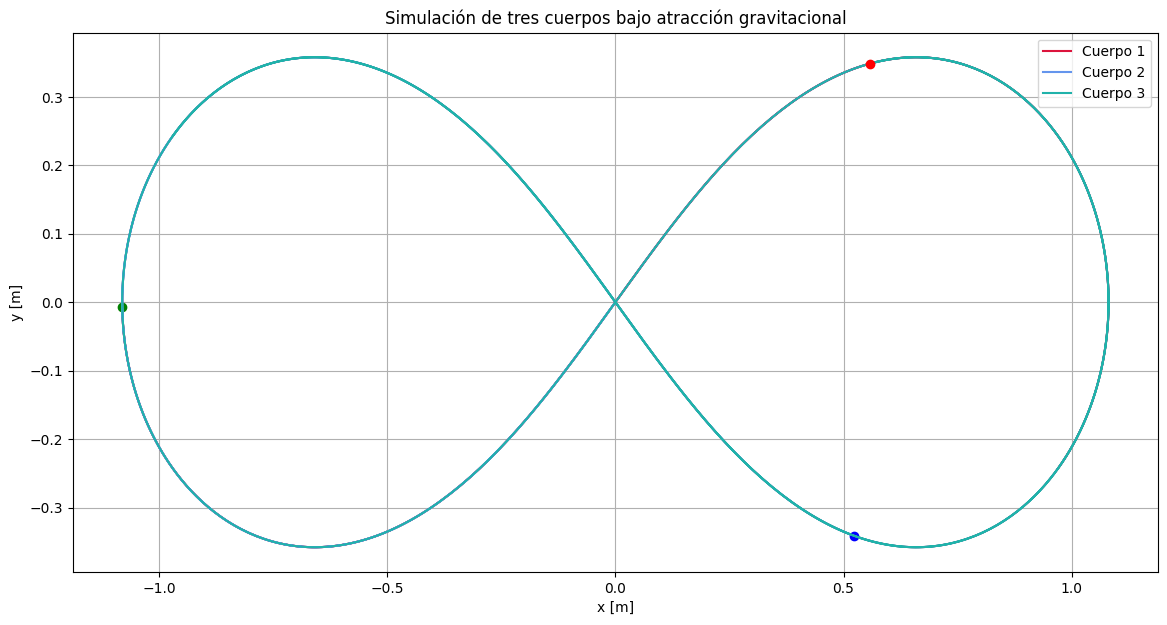

In [ ]:
# Pasando al sistema de centro de masa
R = (m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
V = (m1*v1_sol+m2*v2_sol+m3*v3_sol)/(m1+m2+m3)

r1_sol = r1_sol-R
r2_sol = r2_sol-R
r3_sol = r3_sol-R

v1_sol = v1_sol-V
v2_sol = v2_sol-V
v3_sol = v3_sol-V

# Graficamos el movimiento de los cuerpos
plt.figure(figsize=(14, 7))

# Trayectorias de los cuerpos
plt.plot(r1_sol[:,0], r1_sol[:,1], color='crimson', label='Cuerpo 1') # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1], 'go')
plt.plot(r2_sol[:,0], r2_sol[:,1], color='cornflowerblue', label='Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1], 'bo')
plt.plot(r3_sol[:,0],  r3_sol[:,1],  color='lightseagreen', label='Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'ro')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación de tres cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

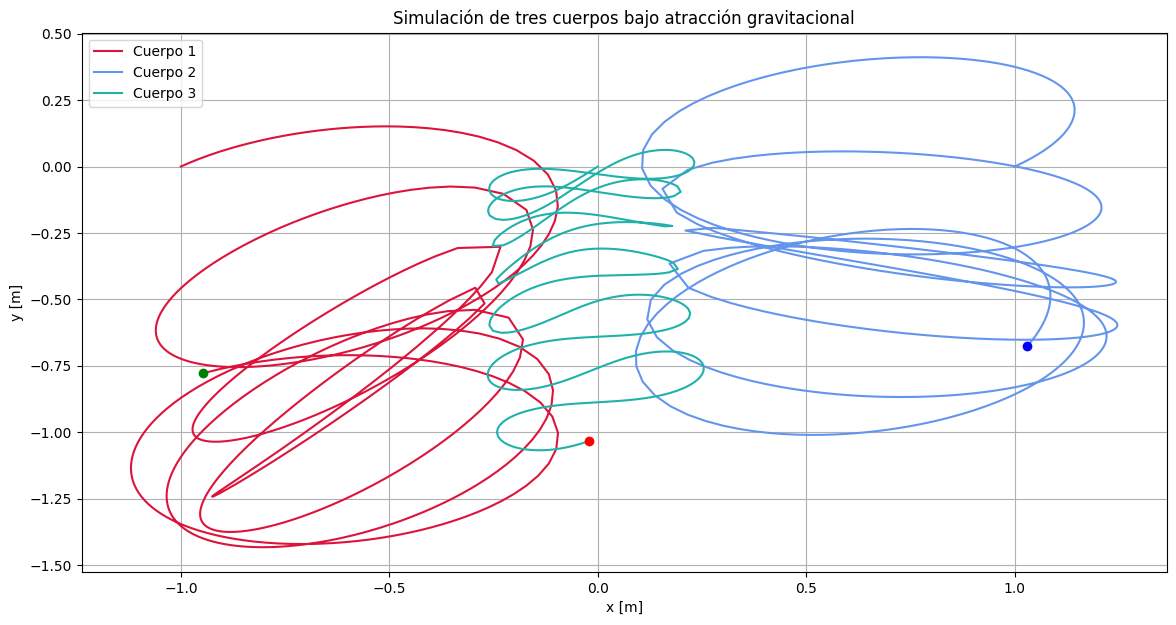

In [ ]:
# Condiciones iniciales masa 1
m1 = 1  # Masa 1 [kg]
r1 = np.array([-1, 0, 0], dtype = 'float64') # Posición inicial del primer cuerpo en el espacio [m]
v1 = np.array([0.9911981217, 0.7119472124, 0], dtype = 'float64') # Velocidad inicial del primer cuerpo en el espacio  [m/s]

# Condiciones iniciales masa 2
m2 = 1  # Masa 2 [kg]
r2 = np.array([1, 0, 0], dtype = 'float64')  # Posición inicial del segundo cuerpo en el espacio [m]
v2 = np.array([0.9911981217, 0.7119472124, 0], dtype = 'float64') # Velocidad inicial del segundo cuerpo en el espacio [m/s]

# Condiciones iniciales masa 3
m3 = 4  # Masa 3 [kg]
r3 = np.array([0, 0, 0], dtype = 'float64')
v3 = np.array([-2*v1[0]/m3, -2*v2[0]/m3, 0.0], dtype = 'float64')

y = np.concatenate([r1, r2, r3, v1, v2, v3]) # Unimos las condiciones iniciales en un solo array

t = np.linspace(0, 10, 1000) # tiempo de simulación

sol = sci.integrate.odeint(tres_cuerpos, y, t, args = (G, m1, m2, m3))

r1_sol = sol[:, 0:3] # Posicion en función del tiempo del cuerpo 1
r2_sol = sol[:, 3:6] # Posición en función del tiempo del cuerpo 2
r3_sol = sol[:, 6:9] # Posición del cuerpo 3

v1_sol = sol[:,9:12]  # Velocidades en función del tiempo del cuerpo 1
v2_sol = sol[:,12:15]  # Velocidades en función del tiempo del cuerpo 2
v3_sol = sol[:,15:18]  # Velocidades en función del tiempo del cuerpo 3

# Graficamos el movimiento de los cuerpos
plt.figure(figsize=(14, 7))

# Trayectorias de los cuerpos
plt.plot(r1_sol[:,0], r1_sol[:,1], color='crimson', label='Cuerpo 1') # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1], 'go')
plt.plot(r2_sol[:,0], r2_sol[:,1], color='cornflowerblue', label='Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1], 'bo')
plt.plot(r3_sol[:,0],  r3_sol[:,1],  color='lightseagreen', label='Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'ro')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación de tres cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # Trayectoria del cuerpo 1
punto1, = ax.plot([], [], 'ro')  # Posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # Trayectoria del cuerpo 2
punto2, = ax.plot([], [], 'bo')  # Posicion actual del cuerpo 2
traza3, = ax.plot([], [], 'g-', lw=2, label='Cuerpo 3')  # Trayectoria del cuerpo 3
punto3, = ax.plot([], [], 'go')  # Posicion actual del cuerpo 3
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])
    traza3.set_data([], [])
    punto3.set_data([], [])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    traza3.set_data(r3_sol[:i, 0], r3_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])
    punto3.set_data([r3_sol[i, 0]], [r3_sol[i, 1]])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(2*t), init_func = inicio, blit = True, interval = 20)
animacion

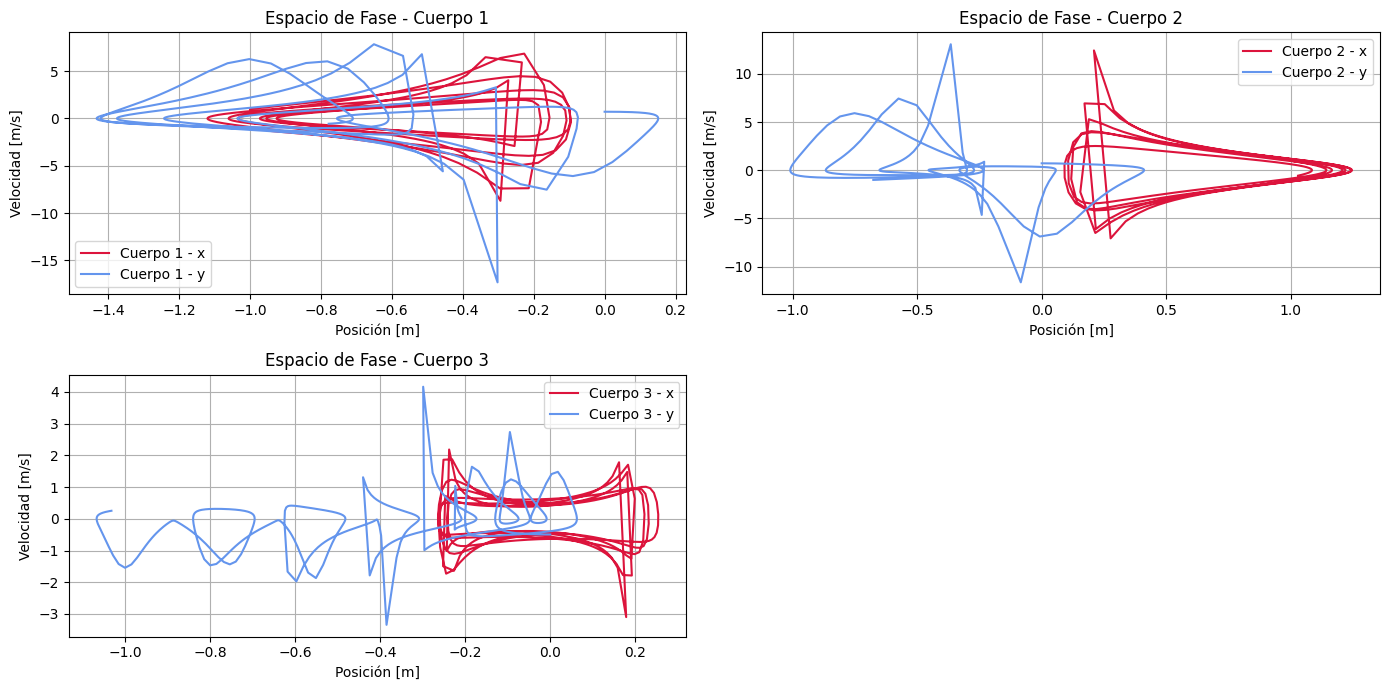

In [ ]:
# Espacio de fase para el cuerpo 1
plt.figure(figsize = (14, 7))
plt.subplot(2, 2, 1)
plt.plot(r1_sol[:,0],v1_sol[:,0], color = 'crimson', label = 'Cuerpo 1 - x')
plt.plot(r1_sol[:,1],v1_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 1 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 1')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 2
plt.subplot(2, 2, 2)
plt.plot(r2_sol[:,0], v2_sol[:,0], color = 'crimson', label = 'Cuerpo 2 - x')
plt.plot(r2_sol[:,1], v2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 2')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 3
plt.subplot(2, 2, 3)
plt.plot(r3_sol[:,0], v3_sol[:,0], color = 'crimson', label = 'Cuerpo 3 - x')
plt.plot(r3_sol[:,1], v3_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 3 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 3')
plt.legend()
plt.grid()

plt.tight_layout()

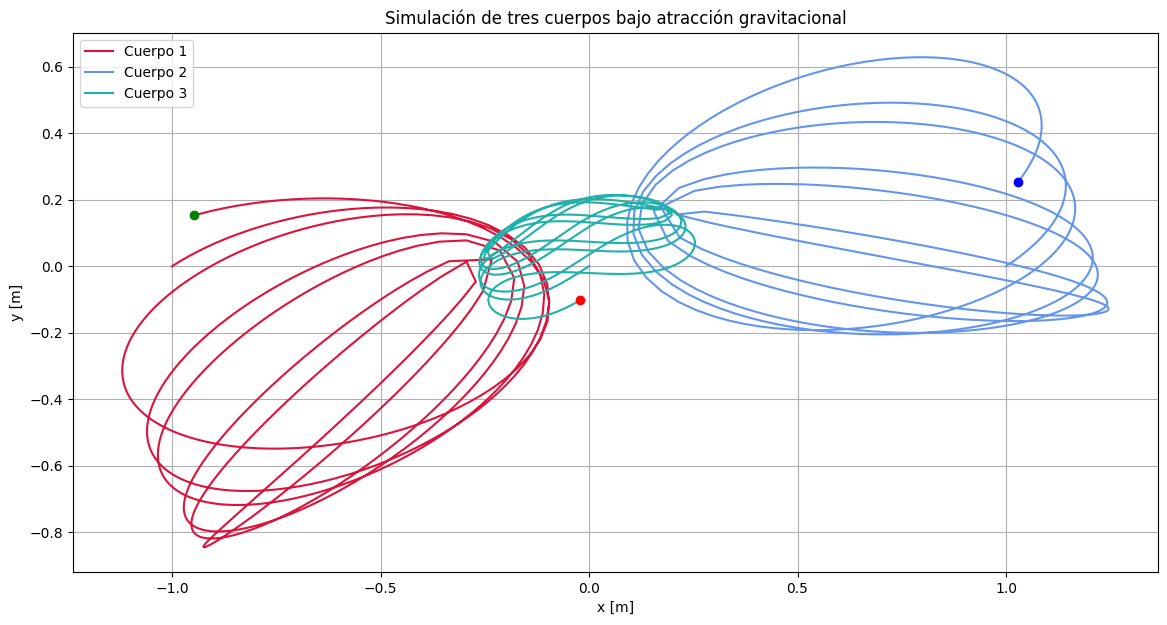

In [ ]:
#pasando al sistema de centro de masa
R  =  (m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
r1_sol = r1_sol-R
r2_sol = r2_sol-R
r3_sol = r3_sol-R

v1_sol = v1_sol-V
v2_sol = v2_sol-V
v3_sol = v3_sol-V

# Graficamos el movimiento de los cuerpos
plt.figure(figsize=(14, 7))

# Trayectorias de los cuerpos
plt.plot(r1_sol[:,0], r1_sol[:,1], color='crimson', label='Cuerpo 1') # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1], 'go')
plt.plot(r2_sol[:,0], r2_sol[:,1], color='cornflowerblue', label='Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1], 'bo')
plt.plot(r3_sol[:,0],  r3_sol[:,1],  color='lightseagreen', label='Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'ro')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación de tres cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # Trayectoria del cuerpo 1
punto1, = ax.plot([], [], 'ro')  # Posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # Trayectoria del cuerpo 2
punto2, = ax.plot([], [], 'bo')  # Posicion actual del cuerpo 2
traza3, = ax.plot([], [], 'g-', lw=2, label='Cuerpo 3')  # Trayectoria del cuerpo 3
punto3, = ax.plot([], [], 'go')  # Posicion actual del cuerpo 3
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])
    traza3.set_data([], [])
    punto3.set_data([], [])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    traza3.set_data(r3_sol[:i, 0], r3_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])
    punto3.set_data([r3_sol[i, 0]], [r3_sol[i, 1]])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(2*t), init_func = inicio, blit = True, interval = 20)
animacion

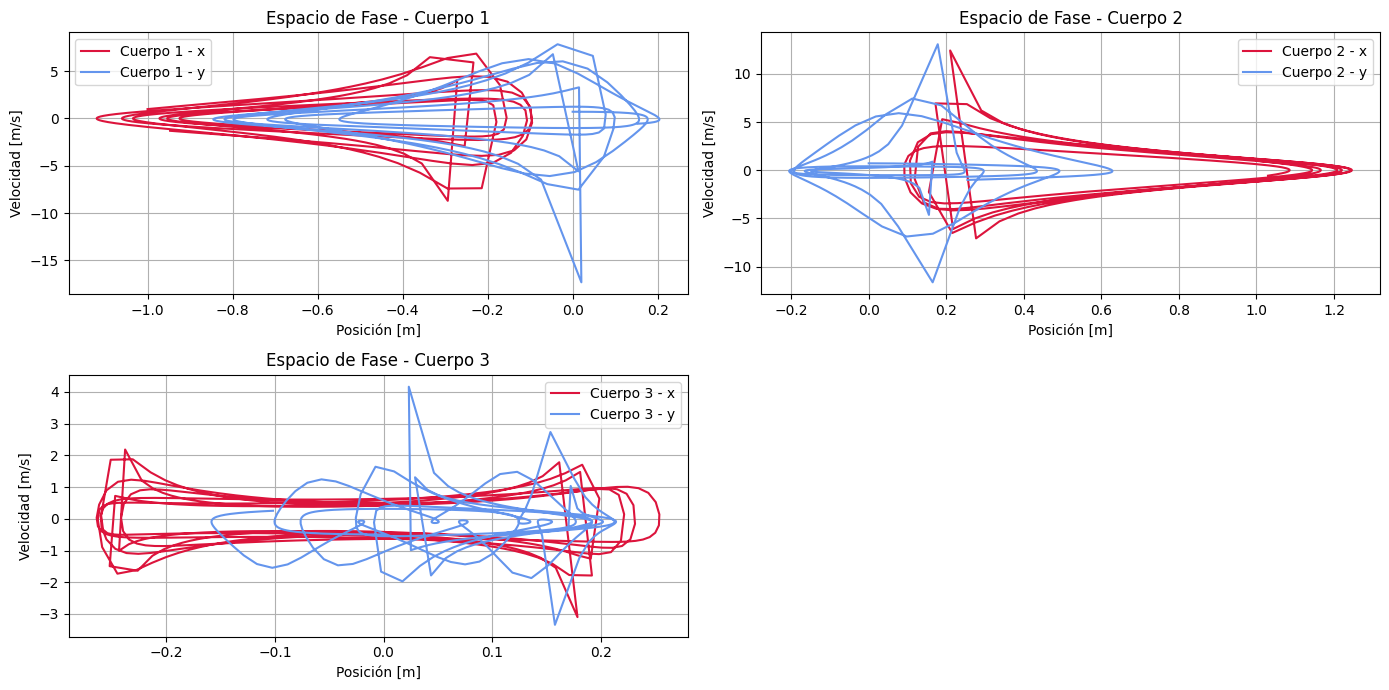

In [ ]:
# Espacio de fase para el cuerpo 1
plt.figure(figsize = (14, 7))
plt.subplot(2, 2, 1)
plt.plot(r1_sol[:,0],v1_sol[:,0], color = 'crimson', label = 'Cuerpo 1 - x')
plt.plot(r1_sol[:,1],v1_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 1 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 1')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 2
plt.subplot(2, 2, 2)
plt.plot(r2_sol[:,0], v2_sol[:,0], color = 'crimson', label = 'Cuerpo 2 - x')
plt.plot(r2_sol[:,1], v2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 2')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 3
plt.subplot(2, 2, 3)
plt.plot(r3_sol[:,0], v3_sol[:,0], color = 'crimson', label = 'Cuerpo 3 - x')
plt.plot(r3_sol[:,1], v3_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 3 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 3')
plt.legend()
plt.grid()

plt.tight_layout()

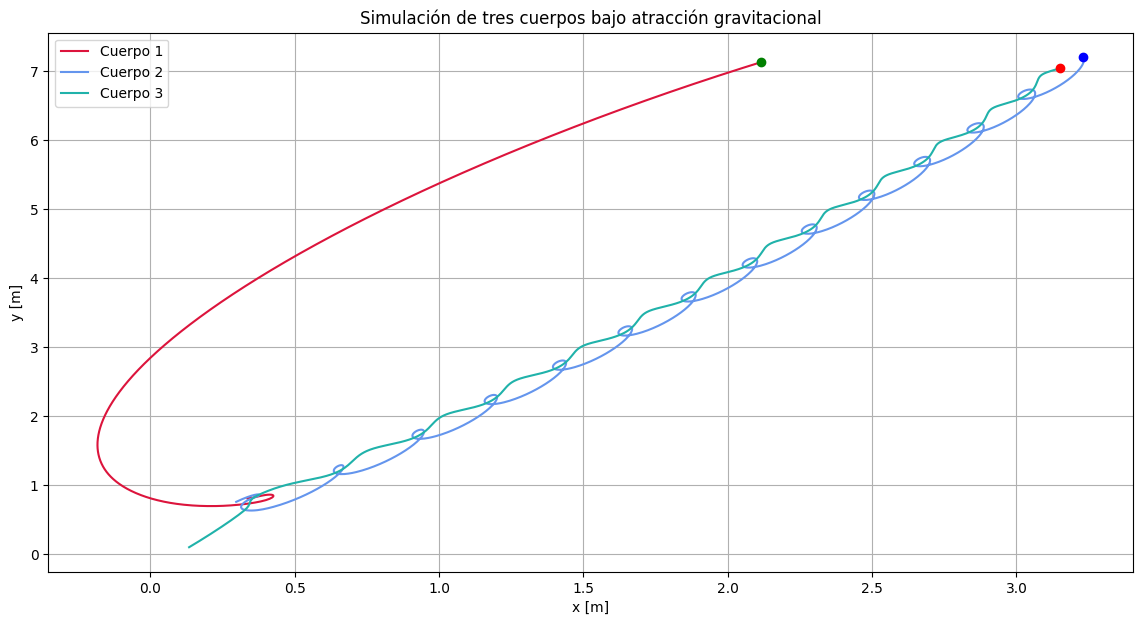

In [ ]:
# Condiciones aleatorias
# Condiciones iniciales masa 1
m1 = random.random()  # Masa 1 [kg]
r1 = np.array([random.random(), random.random(), random.random()], dtype = 'float64') # Posición inicial del primer cuerpo en el espacio [m]
v1 = np.array([random.random(), random.random(), random.random()], dtype = 'float64') # Velocidad inicial del primer cuerpo en el espacio  [m/s]

# Condiciones iniciales masa 2
m2 = random.random()  # Masa 2 [kg]
r2 = np.array([random.random(), random.random(), random.random()], dtype = 'float64')  # Posición inicial del segundo cuerpo en el espacio [m]
v2 = np.array([random.random(), random.random(), random.random()], dtype = 'float64') # Velocidad inicial del segundo cuerpo en el espacio [m/s]

# Condiciones iniciales masa 3
m3 = random.random()  # Masa 3 [kg]
r3 = np.array([random.random(), random.random(), random.random()], dtype = 'float64')
v3 = np.array([random.random(), random.random(), random.random()], dtype = 'float64')

y = np.concatenate([r1, r2, r3, v1, v2, v3]) # Unimos las condiciones iniciales en un solo array

t = np.linspace(0, 10, 1000) # tiempo de simulación

sol = sci.integrate.odeint(tres_cuerpos, y, t, args = (G, m1, m2, m3))

r1_sol = sol[:, 0:3] # Posicion en función del tiempo del cuerpo 1
r2_sol = sol[:, 3:6] # Posición en función del tiempo del cuerpo 2
r3_sol = sol[:, 6:9] # Posición del cuerpo 3

v1_sol = sol[:,9:12]  # Velocidades en función del tiempo del cuerpo 1
v2_sol = sol[:,12:15]  # Velocidades en función del tiempo del cuerpo 2
v3_sol = sol[:,15:18]  # Velocidades en función del tiempo del cuerpo 3

# Graficamos el movimiento de los cuerpos
plt.figure(figsize=(14, 7))

# Trayectorias de los cuerpos
plt.plot(r1_sol[:,0], r1_sol[:,1], color='crimson', label='Cuerpo 1') # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1], 'go')
plt.plot(r2_sol[:,0], r2_sol[:,1], color='cornflowerblue', label='Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1], 'bo')
plt.plot(r3_sol[:,0],  r3_sol[:,1],  color='lightseagreen', label='Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'ro')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulación de tres cuerpos bajo atracción gravitacional')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

x_min = np.array([np.min(r1_sol[:, 0]), np.min(r2_sol[:, 0]), np.min(r3_sol[:, 0])])
x_max = np.array([np.max(r1_sol[:, 0]), np.max(r2_sol[:, 0]), np.max(r3_sol[:, 0])])
y_min = np.array([np.min(r1_sol[:, 1]), np.min(r2_sol[:, 1]), np.min(r3_sol[:, 1])])
y_max = np.array([np.max(r1_sol[:, 1]), np.max(r2_sol[:, 1]), np.max(r3_sol[:, 1])])

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Definir los límites de los ejes
ax.set_xlim(np.min(x_min), np.max(x_max))
ax.set_ylim(np.min(y_min), np.max(y_max))
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # Trayectoria del cuerpo 1
punto1, = ax.plot([], [], 'ro')  # Posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # Trayectoria del cuerpo 2
punto2, = ax.plot([], [], 'bo')  # Posicion actual del cuerpo 2
traza3, = ax.plot([], [], 'g-', lw=2, label='Cuerpo 3')  # Trayectoria del cuerpo 3
punto3, = ax.plot([], [], 'go')  # Posicion actual del cuerpo 3
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])
    traza3.set_data([], [])
    punto3.set_data([], [])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    traza3.set_data(r3_sol[:i, 0], r3_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])
    punto3.set_data([r3_sol[i, 0]], [r3_sol[i, 1]])

    return traza1, punto1, traza2, punto2, traza3, punto3

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(2*t), init_func = inicio, blit = True, interval = 20)
animacion

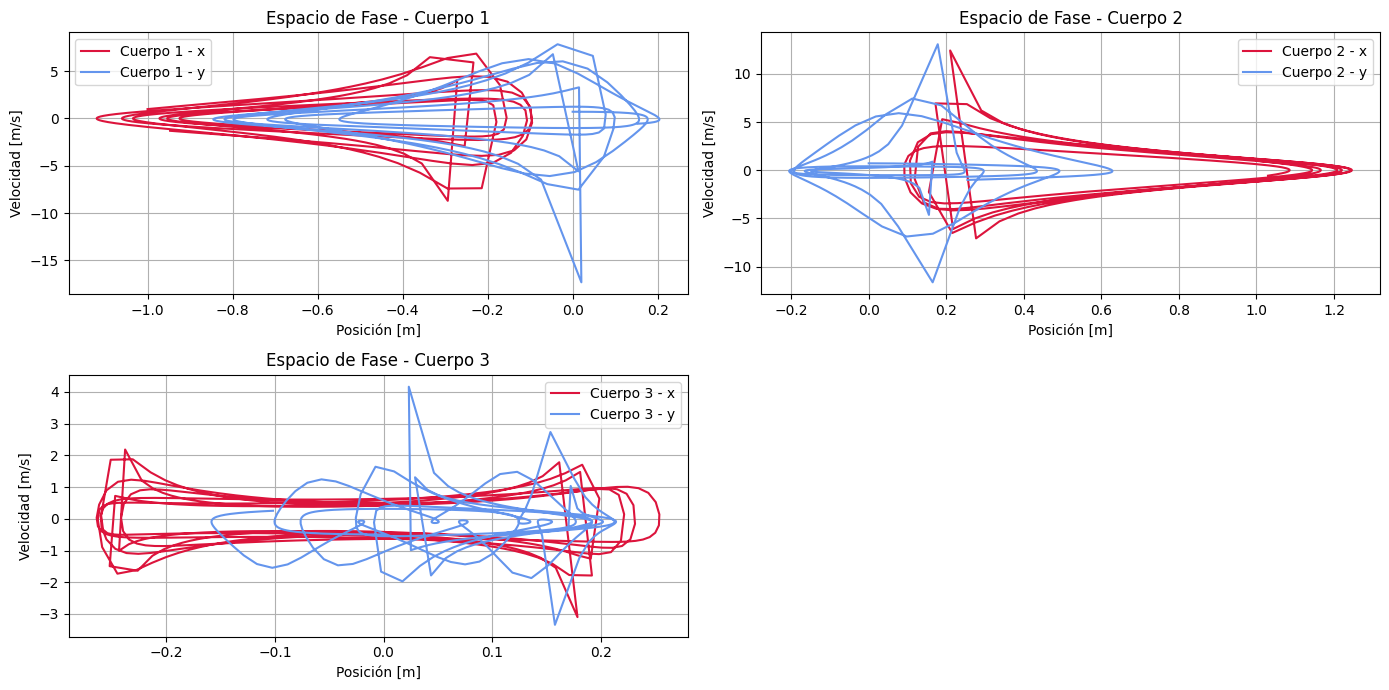

In [ ]:
# Espacio de fase para el cuerpo 1
plt.figure(figsize = (14, 7))
plt.subplot(2, 2, 1)
plt.plot(r1_sol[:,0],v1_sol[:,0], color = 'crimson', label = 'Cuerpo 1 - x')
plt.plot(r1_sol[:,1],v1_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 1 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 1')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 2
plt.subplot(2, 2, 2)
plt.plot(r2_sol[:,0], v2_sol[:,0], color = 'crimson', label = 'Cuerpo 2 - x')
plt.plot(r2_sol[:,1], v2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 2')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 3
plt.subplot(2, 2, 3)
plt.plot(r3_sol[:,0], v3_sol[:,0], color = 'crimson', label = 'Cuerpo 3 - x')
plt.plot(r3_sol[:,1], v3_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 3 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 3')
plt.legend()
plt.grid()

plt.tight_layout()

#**Problema de los cinco cuerpos**


Consideremos cinco cuerpos con masas $m_1,m_2,m_3,m_4,m_5$.
La aceleración de cada cuerpo estará determinado por la suma de las fuerzas gravitacionales ejercidas por los otros cuatro cuerpos:

\begin{equation}
\frac{d \vec{r_i}}{dt}=\sum_{j=1}^{5}\frac{Gm_j(r_j-r_i)}{|r_j-r_i|^3}
\end{equation}

In [ ]:
def cinco_cuerpos(y, t, G, m1, m2, m3, m4, m5):  # Donde y es un array que alamacena las posiciones y velocidades en un solo array
  r1, r2, r3, r4, r5 = y[0:3], y[3:6], y[6:9], y[9:12], y[12:15]  # Los primeros 3 elementos para la posición de r1, los siguientes 3 elementos para la posición r2 y los siguientes tres a r3
  v1, v2, v3, v4, v5 = y[15:18], y[18:21], y[21:24], y[24:27], y[27:30] # Los elemnetos en la posicion 9 a 12 correesponden a v1, los elemnetos en la posicion 12 a 15 correesponden a v2 y los otrso 3 a v3

  # Distancias entre los cuerpos
  r12 = np.linalg.norm(r2-r1)
  r13 = np.linalg.norm(r3-r1)
  r14 = np.linalg.norm(r4-r1)
  r15 = np.linalg.norm(r5-r1)
  r23 = np.linalg.norm(r3-r2)
  r24 = np.linalg.norm(r4-r2)
  r25 = np.linalg.norm(r5-r2)
  r34 = np.linalg.norm(r4-r3)
  r35 = np.linalg.norm(r5-r3)
  r45 = np.linalg.norm(r5-r4)

  # Ecuaciones para la primera derivada de la posción respecto al tiemop(velocidad)
  dr1dt = v1
  dr2dt = v2
  dr3dt = v3
  dr4dt = v4
  dr5dt = v5

  # Ecuaciones para la segunda derivada de la posción respecto al tiemop (aceleración)
  dv1dt = G*m2*(r2-r1)/r12**3+G*m3*(r3-r1)/r13**3+G*m4*(r4-r1)/r14**3+G*m5*(r5-r1)/r15**3
  dv2dt = G*m1*(r1-r2)/r12**3+G*m3*(r3-r2)/r23**3+G*m4*(r4-r2)/r24**3+G*m5*(r5-r2)/r25**3
  dv3dt = G*m1*(r1-r3)/r13**3+G*m2*(r2-r3)/r23**3+G*m4*(r4-r3)/r34**3+G*m5*(r5-r3)/r35**3
  dv4dt = G*m1*(r1-r4)/r14**3+G*m2*(r2-r4)/r24**3+G*m3*(r3-r4)/r34**3+G*m5*(r5-r4)/r45**3
  dv5dt = G*m1*(r1-r5)/r15**3+G*m2*(r2-r5)/r25**3+G*m3*(r3-r5)/r35**3+G*m4*(r4-r5)/r45**3


  dr = np.concatenate([dr1dt, dr2dt, dr3dt, dr4dt, dr5dt, dv1dt, dv2dt, dv3dt, dv4dt, dv5dt]) # Unimos las ecuaciones en un solo array

  return dr

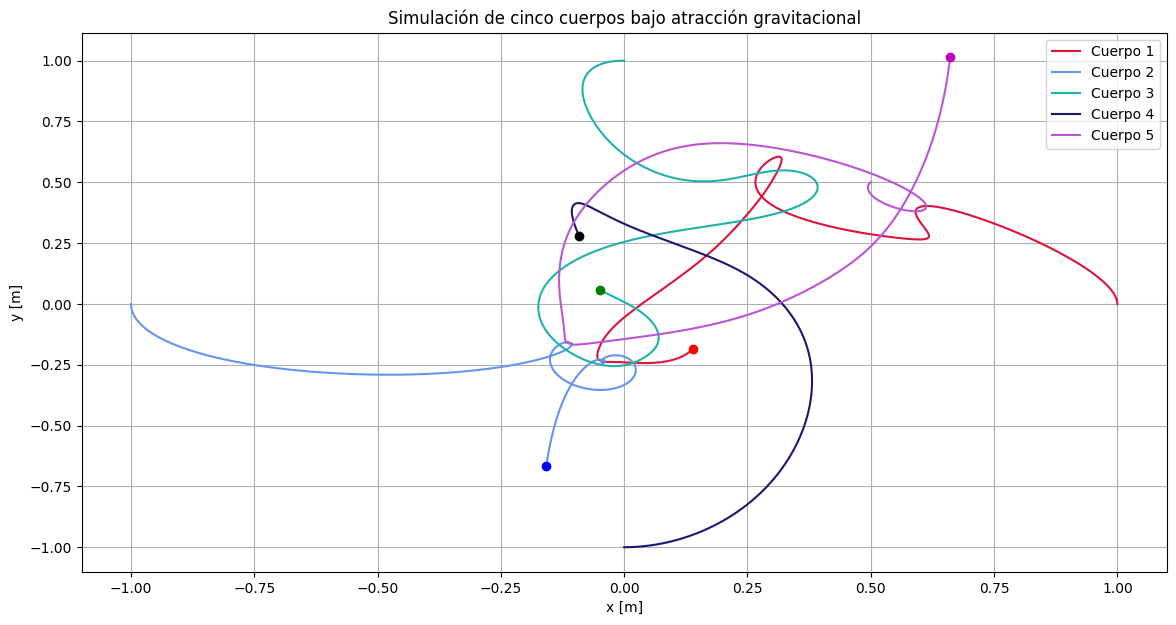

In [ ]:
# Condiciones iniciales masa 1
m1 = 1  # Masa 1 [kg]
r1 = np.array([1,0,0],dtype = 'float64') # Posición inicial del primer cuerpo en el espacio [m]
v1 = np.array([0,0.5,0],dtype = 'float64') # Velocidad inicial del primer cuerpo en el espacio  [m/s]

# Condiciones iniciales masa 2
m2 = 1  # Masa 2 [kg]
r2 = np.array([-1,0,0],dtype = 'float64')  # Posición inicial del segundo cuerpo en el espacio [m]
v2 = np.array([0,-0.5,0],dtype = 'float64') # Velocidad inicial del segundo cuerpo en el espacio [m/s]

# Condiciones iniciales masa 3
m3 = 1  # Masa 3 [kg]
r3 = np.array([0, 1, 0],dtype = 'float64')
v3 = np.array([-0.5,0,0.0],dtype = 'float64')

# Condiciones iniciales masa 4
m4 = 1  # Masa 4 [kg]
r4 = np.array([0,-1,0],dtype = 'float64') # Posición inicial del cuarto cuerpo en el espacio [m]
v4 = np.array([0.5,0,0],dtype = 'float64') # Velocidad inicial del cuarto cuerpo en el espacio  [m/s]

# Condiciones iniciales masa 5
m5 = 1  # Masa 5 [kg]
r5 = np.array([0.5,0.5,0],dtype = 'float64')  # Posición inicial del quinto cuerpo en el espacio [m]
v5 = np.array([0,0,0],dtype = 'float64') # Velocidad inicial del quinto cuerpo en el espacio [m/s]

y = np.concatenate([r1,r2,r3,r4,r5,v1,v2,v3,v4,v5]) # Unimos las condiciones iniciales en un solo array

t = np.linspace(0, 1.5, 1000) # Tiempo de simulación

sol = sci.integrate.odeint(cinco_cuerpos, y, t, args = (G, m1, m2, m3, m4, m5))

r1_sol = sol[:,0:3] # Posicion en función del tiempo del cuerpo 1
r2_sol = sol[:,3:6] # Posición en función del tiempo del cuerpo 2
r3_sol = sol[:,6:9] # Posición del cuerpo 3
r4_sol = sol[:,9:12] # Posición del cuerpo 4
r5_sol = sol[:,12:15] # Posición del cuerpo 5

v1_sol = sol[:,15:18]  # Velocidades en función del tiempo del cuerpo 1
v2_sol = sol[:,18:21]  # Velocidades en función del tiempo del cuerpo 2
v3_sol = sol[:,21:24]  # Velocidades en función del tiempo del cuerpo 3
v4_sol = sol[:,24:27]  # Velocidades en función del tiempo del cuerpo 4
v5_sol = sol[:,27:30]  # Velocidades en función del tiempo del cuerpo 5

plt.figure(figsize = (14, 7))
plt.plot(r1_sol[:,0], r1_sol[:,1], color = 'crimson', label = 'Cuerpo 1')  # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1],'ro')
plt.plot(r2_sol[:,0], r2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1],'bo')
plt.plot(r3_sol[:,0], r3_sol[:,1], color = 'lightseagreen', label = 'Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'go')
plt.plot(r4_sol[:,0], r4_sol[:,1], color = 'midnightblue', label = 'Cuerpo 4')
plt.plot(r4_sol[-1,0], r4_sol[-1,1], 'ko')
plt.plot(r5_sol[:,0], r5_sol[:,1], color = 'mediumorchid', label = 'Cuerpo 5')
plt.plot(r5_sol[-1,0], r5_sol[-1,1], 'mo')
plt.title('Simulación de cinco cuerpos bajo atracción gravitacional')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.grid()

In [ ]:
# Usamos rc para mostrar la animacion
rc('animation', html='jshtml')

# Calculamos las soluciones para un tiempo mayor para tener una mejor representacion en la animacion
t = np.linspace(0, 10, 1000)

sol = sci.integrate.odeint(cinco_cuerpos, y, t, args = (G, m1, m2, m3, m4, m5))

r1_sol = sol[:,0:3] # Posicion en función del tiempo del cuerpo 1
r2_sol = sol[:,3:6] # Posición en función del tiempo del cuerpo 2
r3_sol = sol[:,6:9] # Posición del cuerpo 3
r4_sol = sol[:,9:12] # Posición del cuerpo 4
r5_sol = sol[:,12:15] # Posición del cuerpo 5

# Configuración de la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Simulación de dos cuerpos bajo atracción gravitacional')

# Trayectorias
traza1, = ax.plot([], [], 'r-', lw=2, label='Cuerpo 1')  # Trayectoria del cuerpo 1
punto1, = ax.plot([], [], 'ro')  # Posicion actual del cuerpo 1
traza2, = ax.plot([], [], 'b-', lw=2, label='Cuerpo 2')  # Trayectoria del cuerpo 2
punto2, = ax.plot([], [], 'bo')  # Posicion actual del cuerpo 2
traza3, = ax.plot([], [], 'g-', lw=2, label='Cuerpo 3')  # Trayectoria del cuerpo 3
punto3, = ax.plot([], [], 'go')  # Posicion actual del cuerpo 3
traza4, = ax.plot([], [], 'm-', lw=2, label='Cuerpo 4')  # Trayectoria del cuerpo 4
punto4, = ax.plot([], [], 'mo')  # Posicion actual del cuerpo 4
traza5, = ax.plot([], [], 'k-', lw=2, label='Cuerpo 5')  # Trayectoria del cuerpo 5
punto5, = ax.plot([], [], 'ko')  # Posicion actual del cuerpo 5
ax.legend()
ax.grid()

# Inicialización de la animación
def inicio():
    traza1.set_data([], [])
    punto1.set_data([], [])
    traza2.set_data([], [])
    punto2.set_data([], [])
    traza3.set_data([], [])
    punto3.set_data([], [])
    traza4.set_data([], [])
    punto4.set_data([], [])
    traza5.set_data([], [])
    punto5.set_data([], [])

    return traza1, punto1, traza2, punto2, traza3, punto3, traza4, punto4, traza5, punto5

# Función de animación
def graficar(i):
    # Actualizar trazas
    traza1.set_data(r1_sol[:i, 0], r1_sol[:i, 1])
    traza2.set_data(r2_sol[:i, 0], r2_sol[:i, 1])
    traza3.set_data(r3_sol[:i, 0], r3_sol[:i, 1])
    traza4.set_data(r4_sol[:i, 0], r4_sol[:i, 1])
    traza5.set_data(r5_sol[:i, 0], r5_sol[:i, 1])

    # Actualizar puntos
    punto1.set_data([r1_sol[i, 0]], [r1_sol[i, 1]])
    punto2.set_data([r2_sol[i, 0]], [r2_sol[i, 1]])
    punto3.set_data([r3_sol[i, 0]], [r3_sol[i, 1]])
    punto4.set_data([r4_sol[i, 0]], [r4_sol[i, 1]])
    punto5.set_data([r5_sol[i, 0]], [r5_sol[i, 1]])

    return traza1, punto1, traza2, punto2, traza3, punto3, traza4, punto4, traza5, punto5

# Crear la animación
animacion = FuncAnimation(fig, graficar, frames = len(t), init_func = inicio, blit = True, interval = 20)
animacion

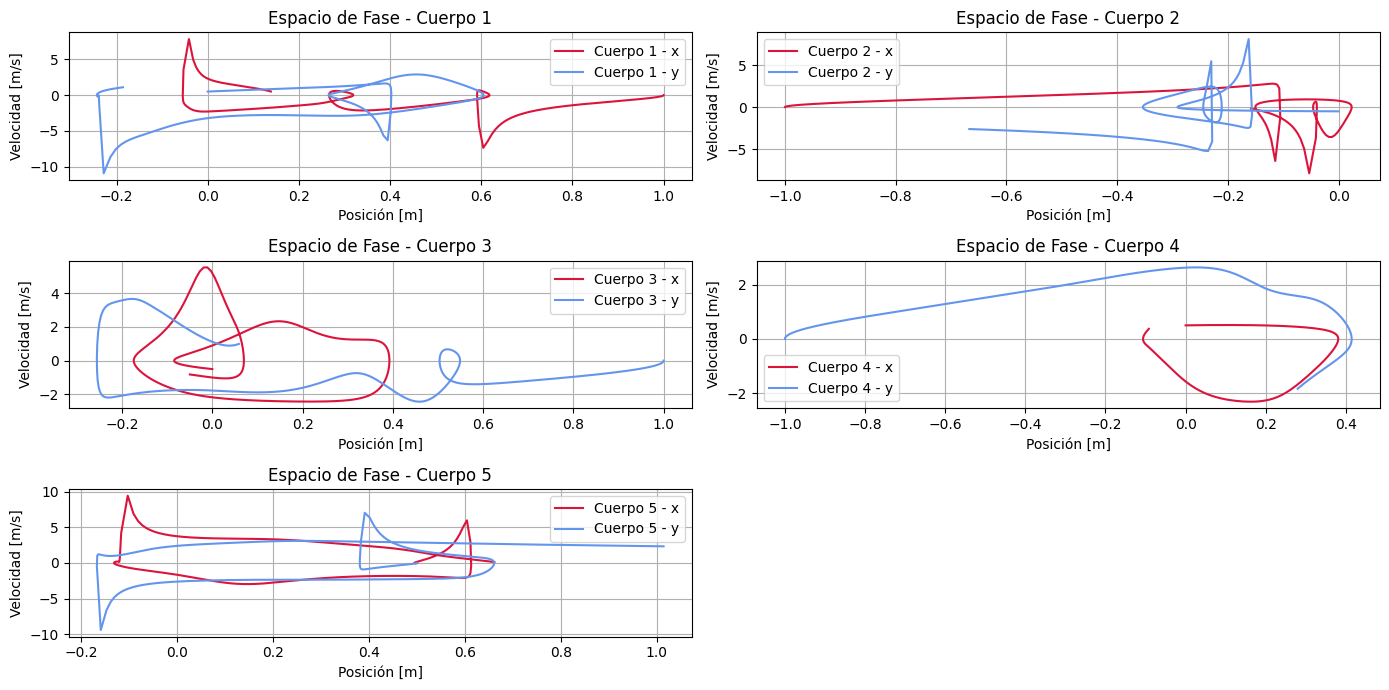

In [ ]:
t = np.linspace(0, 1.5, 1000) # Tiempo de simulación

sol = sci.integrate.odeint(cinco_cuerpos, y, t, args = (G, m1, m2, m3, m4, m5))

r1_sol = sol[:,0:3] # Posicion en función del tiempo del cuerpo 1
r2_sol = sol[:,3:6] # Posición en función del tiempo del cuerpo 2
r3_sol = sol[:,6:9] # Posición del cuerpo 3
r4_sol = sol[:,9:12] # Posición del cuerpo 4
r5_sol = sol[:,12:15] # Posición del cuerpo 5

# Espacio de fase para el cuerpo 1
plt.figure(figsize = (14, 7))
plt.subplot(3, 2, 1)
plt.plot(r1_sol[:,0],v1_sol[:,0], color = 'crimson', label = 'Cuerpo 1 - x')
plt.plot(r1_sol[:,1],v1_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 1 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 1')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 2
plt.subplot(3, 2, 2)
plt.plot(r2_sol[:,0], v2_sol[:,0], color = 'crimson', label = 'Cuerpo 2 - x')
plt.plot(r2_sol[:,1], v2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 2')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 3
plt.subplot(3, 2, 3)
plt.plot(r3_sol[:,0], v3_sol[:,0], color = 'crimson', label = 'Cuerpo 3 - x')
plt.plot(r3_sol[:,1], v3_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 3 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 3')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 4
plt.subplot(3, 2, 4)
plt.plot(r4_sol[:,0], v4_sol[:,0], color = 'crimson', label = 'Cuerpo 4 - x')
plt.plot(r4_sol[:,1], v4_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 4 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 4')
plt.legend()
plt.grid()

# Espacio de fase para el cuerpo 5
plt.subplot(3, 2, 5)
plt.plot(r5_sol[:,0], v5_sol[:,0], color = 'crimson', label = 'Cuerpo 5 - x')
plt.plot(r5_sol[:,1], v5_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 5 - y')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de Fase - Cuerpo 5')
plt.legend()
plt.grid()

plt.tight_layout()

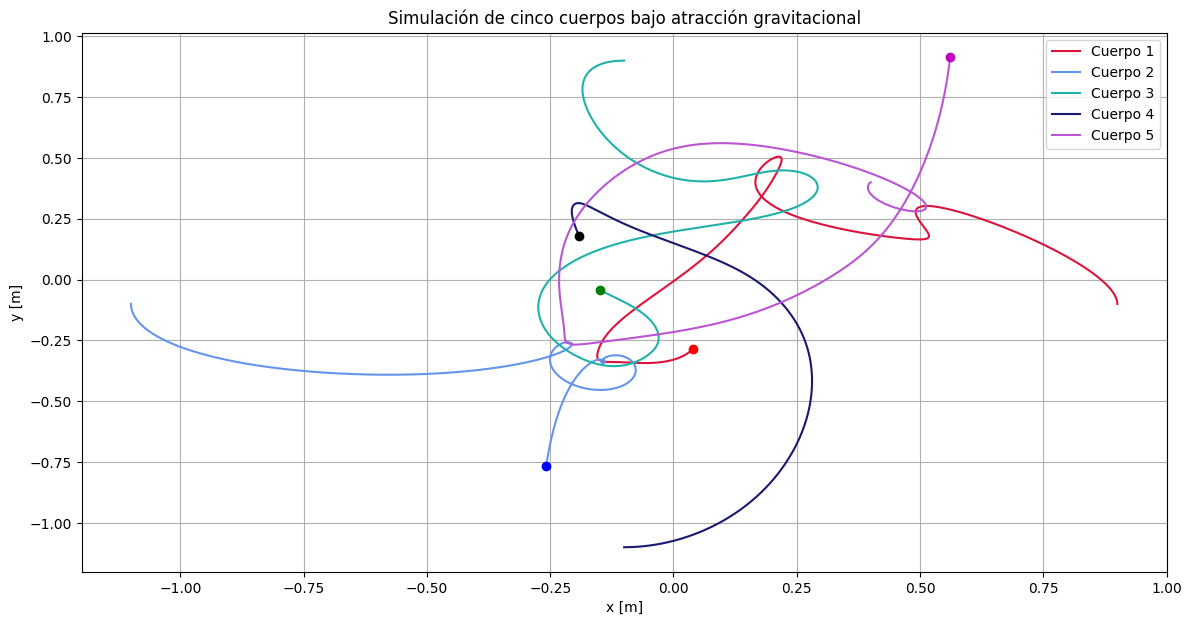

In [ ]:
# Posiciones en el centro de masa
R = (m1*r1_sol+m2*r2_sol+m3*r3_sol+m4*r4_sol+m5*r5_sol)/(m1+m2+m3+m4+m5)
V = (m1*v1_sol+m2*v2_sol+m3*v3_sol)/(m1+m2+m3)

r1_sol = r1_sol-R
r2_sol = r2_sol-R
r3_sol = r3_sol-R
r4_sol = r4_sol-R
r5_sol = r5_sol-R

v1_sol = v1_sol-V
v2_sol = v2_sol-V
v3_sol = v3_sol-V
v4_sol = v4_sol-V
v5_sol = v5_sol-V

plt.figure(figsize = (14, 7))
plt.plot(r1_sol[:,0], r1_sol[:,1], color = 'crimson', label = 'Cuerpo 1')  # r1_sol[:,0] elige los primeros elementos del array y r2_sol[:,1] los segundos
plt.plot(r1_sol[-1,0], r1_sol[-1,1],'ro')
plt.plot(r2_sol[:,0], r2_sol[:,1], color = 'cornflowerblue', label = 'Cuerpo 2')
plt.plot(r2_sol[-1,0], r2_sol[-1,1],'bo')
plt.plot(r3_sol[:,0], r3_sol[:,1], color = 'lightseagreen', label = 'Cuerpo 3')
plt.plot(r3_sol[-1,0], r3_sol[-1,1], 'go')
plt.plot(r4_sol[:,0], r4_sol[:,1], color = 'midnightblue', label = 'Cuerpo 4')
plt.plot(r4_sol[-1,0], r4_sol[-1,1], 'ko')
plt.plot(r5_sol[:,0], r5_sol[:,1], color = 'mediumorchid', label = 'Cuerpo 5')
plt.plot(r5_sol[-1,0], r5_sol[-1,1], 'mo')
plt.title('Simulación de cinco cuerpos bajo atracción gravitacional')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.grid()

<h1> <b>Conclusiones</b> </h1>

1. El modelo computacional para resolver las distintas ecuaciones es acertado, ya que los movimientos de los cuerpos son los esperados.

2. Se evidencia que el comportamiento del problema de cuerpos atraídos gravitacionalmente se vuelve caótico al aumentar el número de cuerpos interactuantes.

3. El uso de herramientas computacionales es poderoso en física, ya que proporciona soluciones numéricas precisas a problemas que no tienen soluciones analíticas.

<h1> <b>Bibliografia</b> </h1>

1 Suvakov, M., & Dmitrašinović, V. (2013). The 1223 new periodic orbits of the planar three-body problem. Physical Review Letters, 110(11), 114301. doi:10.1103/PhysRevLett.110.114301

2 Suvakov, M., & Dmitrašinović, V. (2013). Three Classes of Newtonian Three-Body Planar Periodic Orbits. Physical Review Letters, 110(11), 114301. doi:10.1103/PhysRevLett.110.114302

3 Goldstein, H., Poole, C., & Safko, J. (2002). Classical Mechanics (3rd ed.). Addison Wesley. (See Section 3.12 on the Three-Body Problem).